In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import sklearn.preprocessing 
import numpy as np
from sklearn.linear_model import LinearRegression

In [85]:
#------- importing dataset --------
df_main = pd.read_csv("prices_split_adjusted.csv")
df = pd.DataFrame(df_main[df_main.symbol == 'AKAM'])
print(df.columns.values)

['date' 'symbol' 'open' 'close' 'low' 'high' 'volume']


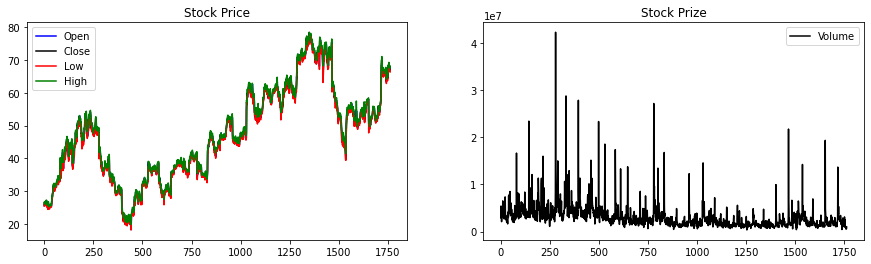

In [86]:
# ----------- Graphical Visualisation of Data ---------------------
plt.figure(figsize = (15,4))
plt.subplot(1,2,1)
plt.plot(df.open.values, color = 'blue', label='Open')
plt.plot(df.close.values, color = 'black', label='Close')
plt.plot(df.low.values, color = 'red', label = 'Low')
plt.plot(df.high.values, color = 'green', label = 'High')
plt.title('Stock Price')
plt.legend()
# plt.show()

plt.subplot(1,2,2)
plt.plot(df.volume.values,color='black', label='Volume')
plt.title('Stock Prize')
plt.legend()


In [87]:
#------------ Function Defination -----------------

#----------Data Transformation/Normalisation------------------

def transform(df):
    mm_scaler = sklearn.preprocessing.MinMaxScaler()
    df['open'] = mm_scaler.fit_transform(df.open.values.reshape(-1,1))
    df['close'] = mm_scaler.fit_transform(df.close.values.reshape(-1,1))
    df['low'] = mm_scaler.fit_transform(df.low.values.reshape(-1,1))
    df['high'] = mm_scaler.fit_transform(df.high.values.reshape(-1,1))
    return df

#-------- Creating Train, Valid, test set in  ratio 80:10:10----------------

def load_data(df, seq_len):
    data = df.to_numpy()
#     data = []
    
#     for index in range(df.shape[0] - seq_len):
#         data.append(df[index:index+seq_len])
    
    data = np.array(data)
    
    valid_size =int(np.around((data.shape[0] * 10)/100))
    test_size = int(np.around((data.shape[0] * 10)/100))
    train_size = data.shape[0] - valid_size - test_size
    
    x_train = data[:train_size, :-1]
    y_train = data[:train_size, -1]
    
    x_valid = data[train_size:train_size+valid_size, :-1]
    y_valid = data[train_size:train_size+valid_size, -1]
    
    x_test = data[train_size+valid_size:, :-1]
    y_test = data[train_size+valid_size:, -1]
    
    return [x_train, y_train, x_valid, y_valid, x_test, y_test]

In [88]:
df=df.drop(['symbol'], axis=1)
df =df.drop(columns=['volume', 'date'])
df_norm = transform(df) 
seq_len = 20
x_train, y_train, x_valid, y_valid, x_test, y_test = load_data(df_norm, seq_len)
print(x_train.shape, y_train.shape, x_valid.shape, y_valid.shape,x_test.shape, y_test.shape)
# print(y_train[:10])

(1410, 3) (1410,) (176, 3) (176,) (176, 3) (176,)


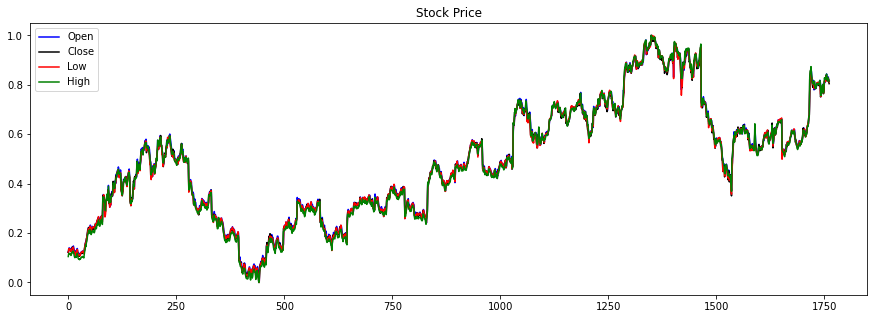

In [89]:
plt.figure(figsize = (15,5))
plt.plot(df_norm.open.values, color = 'blue', label='Open')
plt.plot(df_norm.close.values, color = 'black', label='Close')
plt.plot(df_norm.low.values, color = 'red', label = 'Low')
plt.plot(df_norm.high.values, color = 'green', label = 'High')
plt.title('Stock Price')
plt.legend()

-0.018800331788267288 [ 0.68266987  0.75439548 -0.40801226]


Text(0.5, 1.0, 'Y_valid_pred')

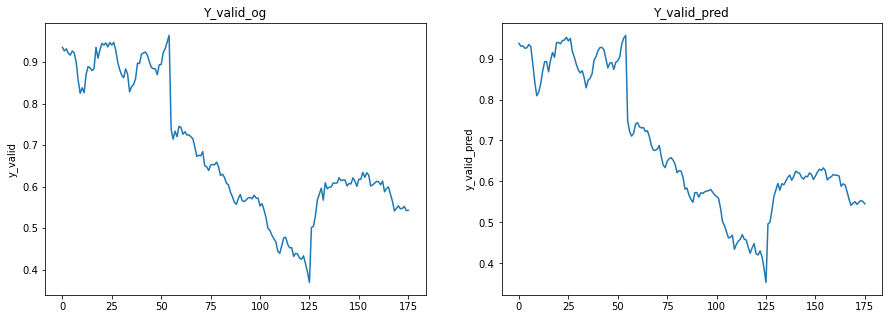

In [90]:
# ------------- model training ---------------------

model = LinearRegression().fit(x_train,y_train)
print(model.intercept_ , model.coef_)
y_valid_pred=model.predict(x_valid)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(y_valid)
plt.ylabel('y_valid')
plt.title('Y_valid_og')

plt.subplot(1,2,2)
plt.plot(y_valid_pred)
plt.ylabel('y_valid_pred')
plt.title('Y_valid_pred')


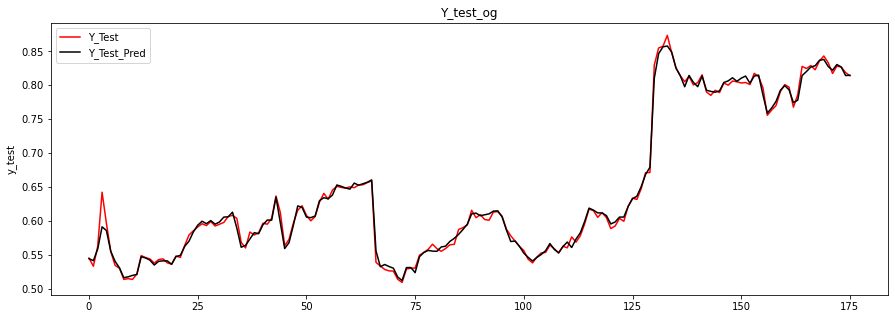

In [93]:
y_test_pred=model.predict(x_test)

plt.figure(figsize=(15,5))
plt.plot(y_test, color = 'red', label = 'Y_Test')
plt.plot(y_test_pred, color = 'black', label = 'Y_Test_Pred')
plt.ylabel('y_test')
plt.title('Y_test_og')
plt.legend(loc='best')